In [1]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
from scipy.stats import pearsonr
from tensorflow.keras.models import load_model
from joblib import load
import joblib
import shutil
from collections import Counter

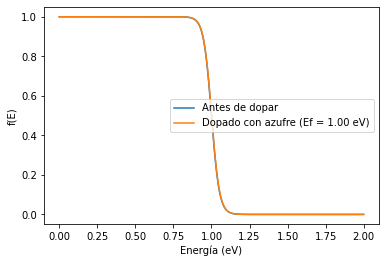

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def fermi_dirac(E, Ef, T):
    k = 8.617333262145e-5  # Constante de Boltzmann en eV/K
    return 1 / (1 + np.exp((E - Ef) / (k * T)))

def dopar_con_material(material, concentracion_dopante):
    if material == 'azufre':
        # Supongamos que el azufre incrementa la energía de Fermi en 0.1 eV
        delta_Ef = 0.1
    elif material == 'estano':
        # Supongamos que el estano incrementa la energía de Fermi en 0.2 eV
        delta_Ef = 0.2
    else:
        raise ValueError('Material de dopaje no reconocido')
    
    return delta_Ef * concentracion_dopante

# Parámetros iniciales
E = np.linspace(0, 2, 1000)  # Rango de energías en eV
Ef = 1  # Energía de Fermi inicial en eV
T = 300  # Temperatura en K

# Dopar el material
Ef_nuevo = Ef + dopar_con_material('azufre', 0.01)

# Calcular la distribución de Fermi-Dirac antes y después de la dopación
fd_antes = fermi_dirac(E, Ef, T)
fd_despues = fermi_dirac(E, Ef_nuevo, T)

# Graficar los resultados
plt.figure()
plt.plot(E, fd_antes, label='Antes de dopar')
plt.plot(E, fd_despues, label=f'Dopado con azufre (Ef = {Ef_nuevo:.2f} eV)')
plt.xlabel('Energía (eV)')
plt.ylabel('f(E)')
plt.legend()
plt.show()


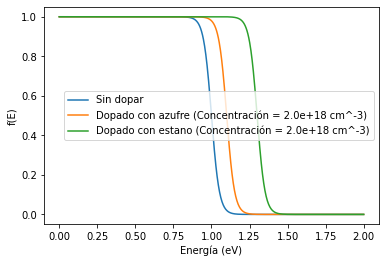

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def fermi_dirac(E, Ef, T):
    k = 8.617333262145e-5  # Constante de Boltzmann en eV/K
    return 1 / (1 + np.exp((E - Ef) / (k * T)))

def dopar_con_material(material, concentracion_dopante):
    # Suponiendo que cada átomo de dopante introduce un electrón adicional
    delta_concentracion = concentracion_dopante
    return delta_concentracion

# Parámetros iniciales
E = np.linspace(0, 2, 1000)  # Rango de energías en eV
Ef = 1  # Energía de Fermi inicial en eV
T = 300  # Temperatura en K
concentracion_inicial = 1e18  # Concentración inicial de electrones en cm^-3

# Dopar el material
concentracion_nueva_azufre = concentracion_inicial + dopar_con_material('azufre', 1e18)
concentracion_nueva_estano = concentracion_inicial + dopar_con_material('estano', 1e18)

# Calcular la distribución de Fermi-Dirac para cada caso
fd_inicial = fermi_dirac(E, Ef, T)
fd_dopado_azufre = fermi_dirac(E, Ef + 0.1, T)  # Suponiendo que la dopación con azufre incrementa Ef en 0.1 eV
fd_dopado_estano = fermi_dirac(E, Ef + 0.3, T)  # Suponiendo que la dopación con estano incrementa Ef en 0.2 eV

# Graficar los resultados
plt.figure()
plt.plot(E, fd_inicial, label='Sin dopar')
plt.plot(E, fd_dopado_azufre, label=f'Dopado con azufre (Concentración = {concentracion_nueva_azufre:.1e} cm^-3)')
plt.plot(E, fd_dopado_estano, label=f'Dopado con estano (Concentración = {concentracion_nueva_estano:.1e} cm^-3)')
plt.xlabel('Energía (eV)')
plt.ylabel('f(E)')
plt.legend()
plt.show()

# Nitruro de Indio
Egap = 1.97eV \
Tipo de estructura cristalina = Hexagonal (FCC) \
Vectores primitivos de la celda = \
    a1 = a/2(i+j) \
    a2 = a/2(j+k) \
    a3 = a/2(k+i) \
Difractograma = \
Valor del parametro de red (a) = 354.5 pm \
Masa efectiva de los huecos y los electrones \
    -Huecos : 1.63 m_0 \
    -Electrones : 0.055 m_0 \
Tipo de semiconductor = n

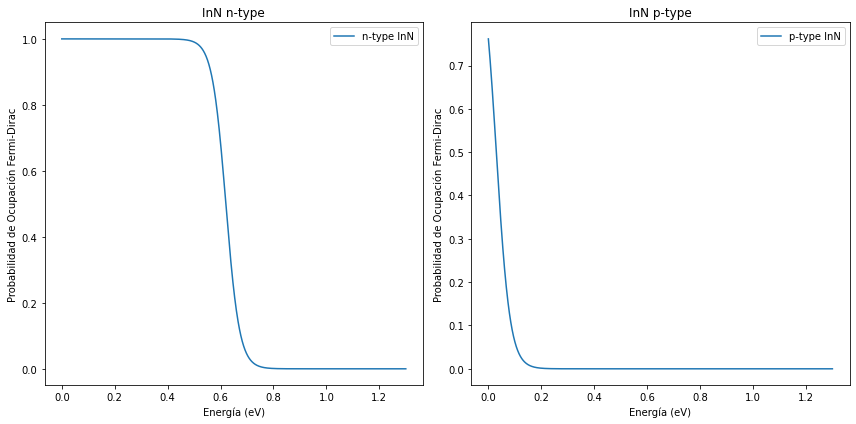

In [4]:
# Constantes
k = 8.617333262145e-5  # Boltzmann constant in eV/K
T = 300  # Temperature in K
Eg = 0.65  # Band gap of InN in eV at 300K
me_electron = 0.11  # Effective mass of electrons for InN (common approximation)
me_hole = 0.9  # Effective mass of holes for InN (common approximation)
ni = 1e10  # Intrinsic carrier concentration in cm^-3 (hypothetical value for InN)

# Niveles de energía de dopantes (valores aproximados)
E_donor = Eg - 0.03  # Energía del nivel de donador típico para InN n-type
E_acceptor = 0.03  # Energía del nivel de aceptor típico para InN p-type

# Concentraciones de dopantes (valores hipotéticos)
Nd = 1e17  # Donor concentration for n-type in cm^-3
Na = 1e17  # Acceptor concentration for p-type in cm^-3

# Función de distribución de Fermi-Dirac
def fermi_dirac(E, Ef, T):
    return 1 / (np.exp((E - Ef) / (k * T)) + 1)

# Encuentra el nivel de Fermi aproximado (método de estimación simple para demostración)
# n-type Fermi level estimation
Ef_n_type = E_donor  # Assuming donor level is fully ionized and defines Fermi level
# p-type Fermi level estimation
Ef_p_type = E_acceptor  # Assuming acceptor level is fully ionized and defines Fermi level

# Rango de energía para graficar
E = np.linspace(0, Eg * 2, 1000)  # in eV

# Graficar la distribución de Fermi-Dirac para n-type y p-type
fd_n_type = fermi_dirac(E, Ef_n_type, T)
fd_p_type = fermi_dirac(E, Ef_p_type, T)

plt.figure(figsize=(12, 6))

# Graficar n-type
plt.subplot(1, 2, 1)
plt.plot(E, fd_n_type, label='n-type InN')
plt.xlabel('Energía (eV)')
plt.ylabel('Probabilidad de Ocupación Fermi-Dirac')
plt.title('InN n-type')
plt.legend()

# Graficar p-type
plt.subplot(1, 2, 2)
plt.plot(E, fd_p_type, label='p-type InN')
plt.xlabel('Energía (eV)')
plt.ylabel('Probabilidad de Ocupación Fermi-Dirac')
plt.title('InN p-type')
plt.legend()

plt.tight_layout()
plt.show()


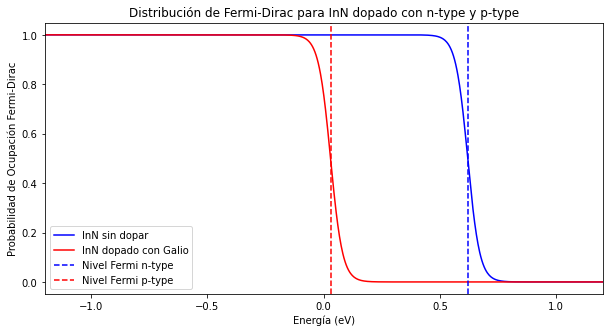

In [5]:
# Constantes
k = 8.617333262145e-5  # Constante de Boltzmann en eV/K
T = 300  # Temperatura en K
Eg = 0.65  # Ancho de banda prohibida de InN en eV a 300K

# Propiedades estimadas para la demostración
Ef_n_type = Eg - 0.03  # Estimación del nivel de Fermi para n-type, cerca de la banda de conducción
Ef_p_type = 0.03       # Estimación del nivel de Fermi para p-type, cerca de la banda de valencia

# Rango de energía para graficar
E = np.linspace(-1.2, 1.2, 1000)  # Extender rango a -1.2 eV a 1.2 eV

# Funciones de ocupación de Fermi-Dirac para n-type y p-type
fd_n_type = 1 / (np.exp((E - Ef_n_type) / (k * T)) + 1)
fd_p_type = 1 / (np.exp((E - Ef_p_type) / (k * T)) + 1)

# Crear la figura y el eje
plt.figure(figsize=(10, 5))

# Graficar la distribución de Fermi-Dirac para n-type y p-type
plt.plot(E, fd_n_type, label='InN sin dopar', color='blue')
plt.plot(E, fd_p_type, label='InN dopado con Galio', color='red')

# Añadir líneas verticales para niveles de Fermi
plt.axvline(x=Ef_n_type, color='blue', linestyle='--', label='Nivel Fermi n-type')
plt.axvline(x=Ef_p_type, color='red', linestyle='--', label='Nivel Fermi p-type')

# Etiquetas y título
plt.xlabel('Energía (eV)')
plt.ylabel('Probabilidad de Ocupación Fermi-Dirac')
plt.title('Distribución de Fermi-Dirac para InN dopado con n-type y p-type')
plt.legend()

# Ajustar los límites del gráfico para el nuevo rango de energía
plt.xlim(-1.2, 1.2)

# Mostrar el gráfico
plt.show()


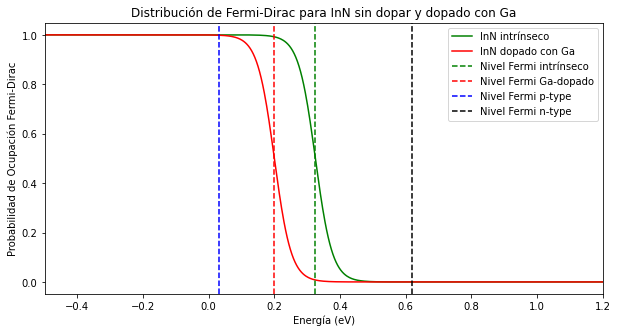

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
k = 8.617333262145e-5  # Constante de Boltzmann en eV/K
T = 300  # Temperatura en K
Eg = 0.65  # Ancho de banda prohibida de InN en eV a 300K

# Para InN intrínseco, asumimos una masa efectiva del electrón y una masa efectiva del hueco
me_electron = 0.11  # Masa efectiva del electrón para InN (aproximación común)
me_hole = 0.9  # Masa efectiva del hueco para InN (aproximación común)
ni = 1e10  # Concentración intrínseca de portadores en cm^-3 (valor hipotético para InN)

# Energía de Fermi para InN intrínseco, estimada en el centro de la banda prohibida
Ef_intrinseco = Eg / 2  

# Energía de ionización de galio en InN, asumiendo que el galio crea niveles de aceptor cerca de la banda de valencia
# Este es un valor estimado en ausencia de datos específicos.
E_ionizacion_Ga = 0.2  # Asumimos un valor típico para el galio en otros semiconductores III-V

# Concentración de galio para dopaje p-tipo
Na_Ga = 1e17  # en cm^-3

# Nivel de Fermi para el InN dopado con galio, asumiendo que los aceptores están completamente ionizados
Ef_Ga_dopado = E_ionizacion_Ga

# Rango de energía para graficar
E = np.linspace(-1.2, 1.2, 1000)  # in eV

# Función de distribución de Fermi-Dirac
def fermi_dirac(E, Ef, T):
    return 1 / (np.exp((E - Ef) / (k * T)) + 1)

# Distribuciones de Fermi-Dirac para InN intrínseco y dopado con galio
fd_intrinseco = fermi_dirac(E, Ef_intrinseco, T)
fd_Ga_dopado = fermi_dirac(E, Ef_Ga_dopado, T)

# Crear la figura para el gráfico
plt.figure(figsize=(10, 5))

# Graficar distribución para InN intrínseco
plt.plot(E, fd_intrinseco, label='InN intrínseco', color='green')

# Graficar distribución para InN dopado con galio
plt.plot(E, fd_Ga_dopado, label='InN dopado con Ga', color='red')

# Añadir líneas verticales para indicar el nivel de Fermi en ambos casos
plt.axvline(x=Ef_intrinseco, color='green', linestyle='--', label='Nivel Fermi intrínseco')
plt.axvline(x=Ef_Ga_dopado, color='red', linestyle='--', label='Nivel Fermi Ga-dopado')
plt.axvline(x=Ef_p_type, color='blue', linestyle='--', label='Nivel Fermi p-type')
plt.axvline(x=Ef_n_type, color='black', linestyle='--', label='Nivel Fermi n-type')

# Añadir etiquetas y título
plt.xlabel('Energía (eV)')
plt.ylabel('Probabilidad de Ocupación Fermi-Dirac')
plt.title('Distribución de Fermi-Dirac para InN sin dopar y dopado con Ga')
plt.legend()

# Ajustar los límites del gráfico para el rango de energía deseado
plt.xlim(-0.5, 1.2)

# Mostrar el gráfico
plt.show()
